Import the necessary librarys

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Data Import

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1


In [ ]:
file_path = f"{path}/Churn_Modelling.csv"
df = pd.read_csv(file_path)

### **EDA**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# Don't need to keep customerid or surname
del df['CustomerId']
del df['Surname']

In [ ]:
# Check for null values
df.isnull().sum()

,0
RowNumber,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1


In [ ]:
# Select rows where 'column_name' has missing values (NaN)
missing_rows = df[df['IsActiveMember'].isna()]

# Display the rows with missing values in 'column_name'
print(missing_rows)


   RowNumber  CreditScore Geography Gender   Age  Tenure    Balance  \
8          9          501    France   Male  44.0       4  142051.07   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
8              2        0.0             NaN          74940.5       0  


In [ ]:
# Delete rows where Geography and Age has missing values
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Geography'])


In [ ]:
# Replace Empty in HasCrCard and IsActiveMember with 0
df['HasCrCard'] = df['HasCrCard'].fillna(0)
df['IsActiveMember'] = df['IsActiveMember'].fillna(0)


In [ ]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5002.498200,650.534600,38.921203,5.012600,76492.950710,1.530200,0.705400,0.514800,100095.168958,0.203800
std,2886.897411,96.655496,10.487139,2.892037,62392.318347,0.581654,0.455886,0.499806,57506.122299,0.402842
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2502.750000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5002.500000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7502.250000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# Lower case all column names and replace blanks with _
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.head()

,rownumber,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,850,Spain,Female,43.0,2,125510.82,1,0.0,1.0,79084.10,0


In [ ]:
df.nunique()

,0
rownumber,9998
creditscore,460
geography,3
gender,2
age,73
tenure,11
balance,6381
numofproducts,4
hascrcard,2
isactivemember,2


In [ ]:
df.geography.value_counts()

,count
geography,
France,5013
Germany,2510
Spain,2477


In [ ]:
df.gender.value_counts()

,count
gender,
Male,5456
Female,4544


In [ ]:
df.hascrcard.value_counts()

,count
hascrcard,
1.0,7054
0.0,2946


In [ ]:
df.isactivemember.value_counts()

,count
isactivemember,
1.0,5148
0.0,4852


Want to change Active Member and Credit Card to yes/no because it's a binary code.

In [ ]:
translate_values = {0: 'No', 1: 'Yes'}
df['isactivemember'] = df['isactivemember'].map(translate_values)
df['hascrcard'] = df['hascrcard'].map(translate_values)

In [ ]:
# Frequency of the churn variable
df.exited.value_counts(normalize=True)

,proportion
exited,
0,0.7962
1,0.2038


Distribution of some variables

<Axes: xlabel='creditscore', ylabel='Count'>

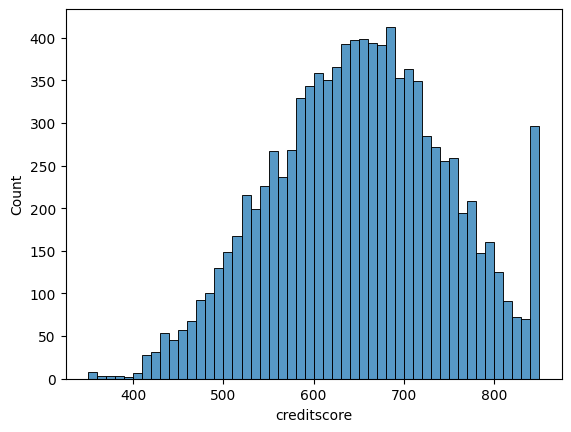

In [ ]:
sns.histplot(df.creditscore, bins = 50)

<Axes: xlabel='balance', ylabel='Count'>

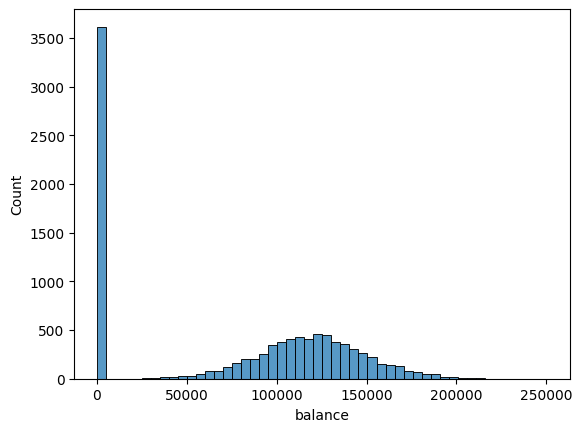

In [ ]:
sns.histplot(df.balance, bins = 50)

Analysis of Target Variable

In [ ]:
df.dtypes

,0
rownumber,int64
creditscore,int64
geography,object
gender,object
age,float64
tenure,int64
balance,float64
numofproducts,int64
hascrcard,object
isactivemember,object


In [ ]:
categorical = ['geography', 'gender', 'isactivemember', 'hascrcard']
numerical = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [ ]:
for c in categorical:
  print(c)
  df_group = df.groupby(c).exited.agg(['mean', 'count'])
  df_group['diff']= df_group['mean'] - df.exited.mean()
  df_group['risk'] = df_group['mean'] / df.exited.mean()
  display(df_group)
  print()
  print()

geography


,mean,count,diff,risk
geography,,,,
France,0.161580,5013,-0.042220,0.792836
Germany,0.324701,2510,0.120901,1.593235
Spain,0.166734,2477,-0.037066,0.818125




gender


,mean,count,diff,risk
gender,,,,
Female,0.250660,4544,0.046860,1.229932
Male,0.164773,5456,-0.039027,0.808502




isactivemember


,mean,count,diff,risk
isactivemember,,,,
No,0.268549,4852,0.064749,1.317709
Yes,0.142774,5148,-0.061026,0.700559




hascrcard


,mean,count,diff,risk
hascrcard,,,,
No,0.208079,2946,0.004279,1.020995
Yes,0.202013,7054,-0.001787,0.991232


Feature Importance & Mutual Information

In [ ]:
def calculate_mutual_info(series):
  return mutual_info_score(series, df.exited)

In [ ]:
cmi = df[categorical].apply(calculate_mutual_info)
cmi.sort_values(ascending=False)

,0
geography,0.014058
isactivemember,0.012280
gender,0.005615
hascrcard,0.000023


In [ ]:
df[numerical].corrwith(df.exited)

,0
creditscore,-0.026806
age,0.285391
tenure,-0.014137
balance,0.118458
numofproducts,-0.047611
estimatedsalary,0.012021


Split into Train Test and Validation Datasets

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.exited.values
y_val = df_val.exited.values
y_test = df_test.exited.values

In [ ]:
del df_train['exited']
del df_val['exited']
del df_test['exited']

In [ ]:
sample_record = df_train.sample(1).to_dict(orient='records')[0]  # Get a single random sample
print("Customer:", sample_record)

Customer: {'rownumber': 9494, 'creditscore': 664, 'geography': 'France', 'gender': 'Female', 'age': 36.0, 'tenure': 0, 'balance': 103502.22, 'numofproducts': 1, 'hascrcard': 'Yes', 'isactivemember': 'Yes', 'estimatedsalary': 146191.82}


# **One Hot Encoding**

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dicts_val = df_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

Logistic Regression

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]

In [ ]:
decision = (y_pred>=0.5)

In [ ]:
orig_acc = round((y_val == decision).mean(),2)
print(orig_acc)

0.79


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_val, y_pred).round(3)

0.66

Now fine tune the C parameter

In [ ]:
for c in [0.001,0.01, 0.1, 1, 10, 100,1000]:
  model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=1)
  model.fit(X_train, y_train)

  y_pred_c = model.predict_proba(X_val)[:,1]

  decision_c = (y_pred_c>=0.5)

  roc_auc_score(y_val, y_pred_c).round(3)

  print(c, (y_val == decision_c).mean(), roc_auc_score(y_val, y_pred_c).round(3))

0.001 0.78 0.682
0.01 0.779 0.683
0.1 0.779 0.683
1 0.779 0.683
10 0.779 0.683
100 0.779 0.683
1000 0.779 0.683


C doesn't really change the model so I can leave C = 1.0

Trying 5-fold and Hyperparameter Tuning next.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits = 5, shuffle= True, random_state = 1 )

In [ ]:
train_idx, val_idx =next(kfold.split(df_full_train))

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5,1,5,10,100]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_kfold = df_full_train.iloc[train_idx]
        df_val_kfold = df_full_train.iloc[val_idx]

        y_train_kfold = df_train_kfold.exited.values
        y_val_kfold = df_val_kfold.exited.values

        dv, model_kfold = train(df_train_kfold, y_train_kfold, C=C)
        y_pred_kfold = predict(df_val_kfold, dv,model_kfold)

        auc = roc_auc_score(y_val_kfold, y_pred_kfold)
        scores.append(auc)

    print('C = %s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


  0%|          | 0/8 [00:00<?, ?it/s]

C = 0.001 0.677 +- 0.011
C = 0.01 0.679 +- 0.008
C = 0.1 0.677 +- 0.007
C = 0.5 0.679 +- 0.008
C = 1 0.680 +- 0.009
C = 5 0.677 +- 0.008
C = 10 0.682 +- 0.005
C = 100 0.675 +- 0.011


Here we can see that C of 10 is best as it's got the highest AUC but also a low Standard deviation

Let's now look at Precision and Recall

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]

decision = (y_pred>=0.5)

orig_acc = round((y_val == decision).mean(),2)

In [ ]:
scores = []


thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp= (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,420,1580,0,0
10,0.1,403,1303,17,277
20,0.2,285,652,135,928
30,0.3,168,277,252,1303
40,0.4,82,112,338,1468
50,0.5,30,52,390,1528
60,0.6,14,20,406,1560
70,0.7,4,6,416,1574
80,0.8,1,1,419,1579
90,0.9,0,0,420,1580


In [ ]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

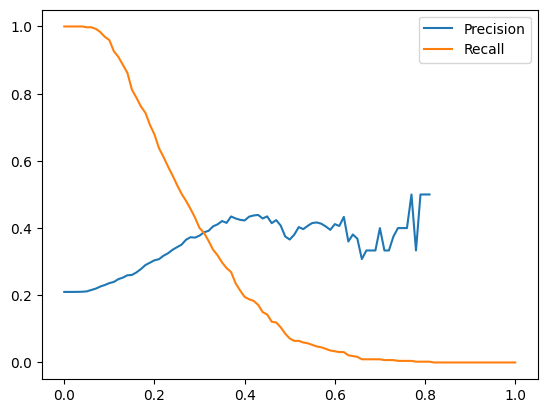

In [ ]:
plt.plot(df_scores.threshold, df_scores['precision'], label = 'Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label = 'Recall')
plt.legend()

In [ ]:
df_scores['diff'] = np.abs(df_scores['precision'] - df_scores['recall'])

In [ ]:
optimal_row = df_scores.loc[df_scores['diff'].idxmin()]

In [ ]:
optimal_threshold = optimal_row['threshold']
optimal_precision = optimal_row['precision']
optimal_recall = optimal_row['recall']

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {optimal_precision}")
print(f"Recall: {optimal_recall}")

Optimal Threshold: 0.31
Precision: 0.3875598086124402
Recall: 0.38571428571428573


Let's try F1 score

In [ ]:
# Add an F1 score column to `df_scores`
df_scores['f1_score'] = 2 * (df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall'])

# Now find the row with the maximum F1 score
optimal_row = df_scores.loc[df_scores['f1_score'].idxmax()]


In [ ]:
optimal_threshold = optimal_row['threshold']
optimal_precision = optimal_row['precision']
optimal_recall = optimal_row['recall']

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {optimal_precision}")
print(f"Recall: {optimal_recall}")
print(f"F1 Score: {optimal_row['f1_score']}")


Optimal Threshold: 0.2
Precision: 0.304162219850587
Recall: 0.6785714285714286
F1 Score: 0.42004421518054536


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define thresholds to test
thresholds = [0.2, 0.22, 0.24, 0.26, 0.28]

for thresh in thresholds:
    # Predict probabilities and apply threshold
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_prob >= thresh).astype(int)

    # Calculate metrics
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"Threshold: {thresh:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1:.2f}")


Threshold: 0.20 | Precision: 0.30 | Recall: 0.68 | F1 Score: 0.42
Threshold: 0.22 | Precision: 0.32 | Recall: 0.61 | F1 Score: 0.42
Threshold: 0.24 | Precision: 0.34 | Recall: 0.56 | F1 Score: 0.42
Threshold: 0.26 | Precision: 0.35 | Recall: 0.50 | F1 Score: 0.41
Threshold: 0.28 | Precision: 0.37 | Recall: 0.46 | F1 Score: 0.41


As we're trying to stop customers churning but we don't want to sent the promotion out to everyone and loose money we need to balance Precision and Recall so 0.24 is the best threshold.

Now building a Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.exited.values
y_val = df_val.exited.values
y_test = df_test.exited.values

del df_train['exited']
del df_val['exited']
del df_test['exited']

In [ ]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dicts_val = df_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

In [ ]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- age <= 42.50
|   |--- class: 0
|--- age >  42.50
|   |--- class: 0



In [ ]:
# Test the Decision Tree built
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [ ]:
roc_auc_score(y_val, y_pred)

0.6891350210970464

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [ ]:
# Re-train while controlling the depth
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#The performance on validation is a lot better when we've restricted the depth
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7943619544592029
val: 0.8029490657022303


In [ ]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- age <= 42.50
|   |--- numofproducts <= 2.50
|   |   |--- numofproducts <= 1.50
|   |   |   |--- class: 0
|   |   |--- numofproducts >  1.50
|   |   |   |--- class: 0
|   |--- numofproducts >  2.50
|   |   |--- balance <= 23194.08
|   |   |   |--- class: 0
|   |   |--- balance >  23194.08
|   |   |   |--- class: 1
|--- age >  42.50
|   |--- isactivemember=No <= 0.50
|   |   |--- numofproducts <= 2.50
|   |   |   |--- class: 0
|   |   |--- numofproducts >  2.50
|   |   |   |--- class: 1
|   |--- isactivemember=No >  0.50
|   |   |--- age <= 48.50
|   |   |   |--- class: 0
|   |   |--- age >  48.50
|   |   |   |--- class: 1



Decision Tree Parameter Tuning

In [ ]:
# Tune depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.700
   2 -> 0.763
   3 -> 0.803
   4 -> 0.822
   5 -> 0.830
   6 -> 0.830
  10 -> 0.757
  15 -> 0.706
  20 -> 0.701
None -> 0.693


Best Depth is 5 or 6 with 4 being quite close

In [ ]:
# Tune Min leaf
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

In [ ]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.822  0.830  0.829
5                 0.822  0.836  0.838
10                0.822  0.835  0.836
15                0.822  0.835  0.837
20                0.823  0.836  0.838
100               0.793  0.796  0.804
200               0.790  0.794  0.797
500               0.772  0.772  0.772

In [ ]:
df_scores.sort_values(by='auc', ascending = False)

,max_depth,min_samples_leaf,auc
20,6,20,0.837971
17,6,5,0.837578
19,6,15,0.836881
12,5,20,0.836310
18,6,10,0.836296
9,5,5,0.836168
11,5,15,0.835493
10,5,10,0.834515
8,5,1,0.829517
16,6,1,0.829185


<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

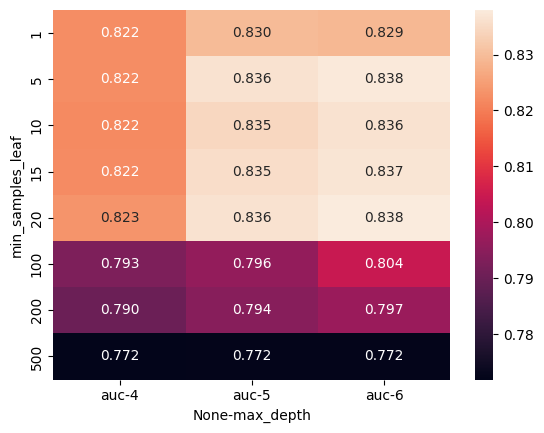

In [ ]:
# Visualize in a heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [ ]:
# Now building the best model from the above tuning
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

In [ ]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.8379468053044002

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scores = []

# This goes from 10 to 201 adding 10 everytime
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [ ]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [ ]:
df_scores

,n_estimators,auc
0,10,0.816846
1,20,0.832178
2,30,0.843131
3,40,0.843994
4,50,0.848458
5,60,0.848214
6,70,0.848828
7,80,0.851319
8,90,0.852189
9,100,0.853314


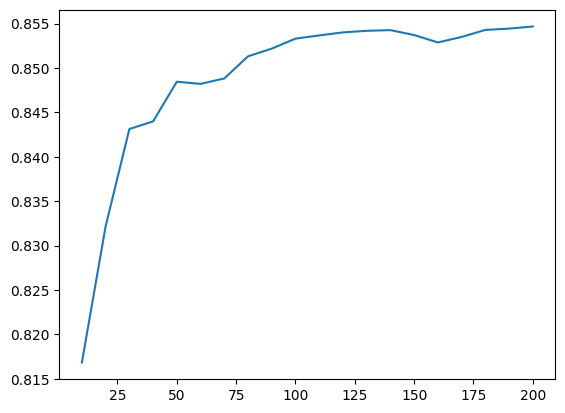

In [ ]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [ ]:
# test for different depths
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [ ]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

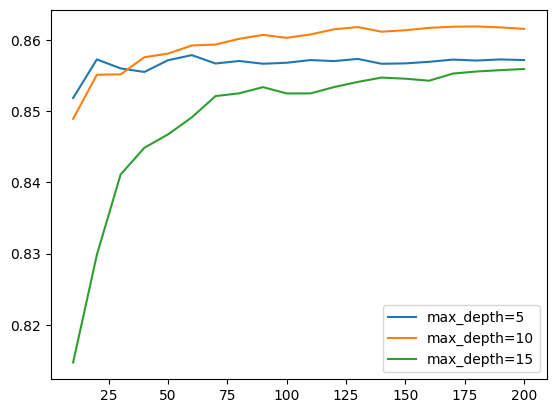

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [ ]:
# A Depth of 10 is best
max_depth = 10

In [ ]:
# test min_sample_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [ ]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores

,min_samples_leaf,n_estimators,auc
0,1,10,0.848918
1,1,20,0.855104
2,1,30,0.855155
3,1,40,0.857560
4,1,50,0.858070
...,...,...,...
95,50,160,0.856269
96,50,170,0.856637
97,50,180,0.856266
98,50,190,0.856120


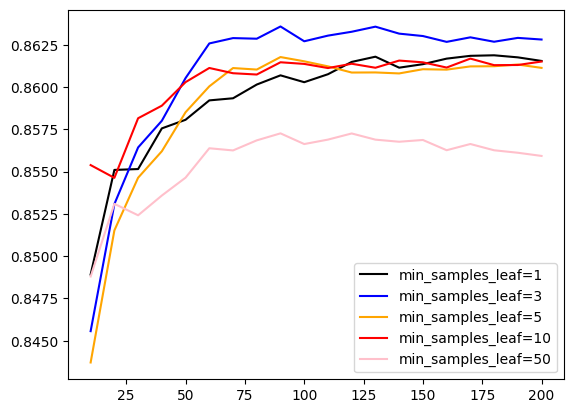

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'pink']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [ ]:
# Blue is better than the others as it gets a higher AUC
min_samples_leaf = 3

In [ ]:
# Re-train with the values we've decided
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
# Need a special data structure, that is specialised for XGBoost
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
# Train a model
xgb_params = {
    'eta': 0.3, #learning rate how fast the model learns
    'max_depth': 6, # depth of the trees
    'min_child_weight': 1, # Same as min sample leaf

    'objective': 'binary:logistic', # Type of modelling
    'nthread': 8, #number of CPU threads (cores) to be used by the XGBoost algorithm during training.

    'seed': 1, # reproducibility
    'verbosity': 1, # the type of warnings we have when we train
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dval)

In [ ]:
roc_auc_score(y_val, y_pred)

0.8543143459915612

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
# See the output from each run - verbose_eval says print every X so this says go every 5
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
s = output.stdout

In [ ]:
print(s[:200])

[0]	train-auc:0.86776	val-auc:0.83562
[5]	train-auc:0.90329	val-auc:0.85253
[10]	train-auc:0.92231	val-auc:0.85438
[15]	train-auc:0.93617	val-auc:0.85293
[20]	train-auc:0.94746	val-auc:0.85296
[25]	tr


In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [ ]:
df_score = parse_xgb_output(output)

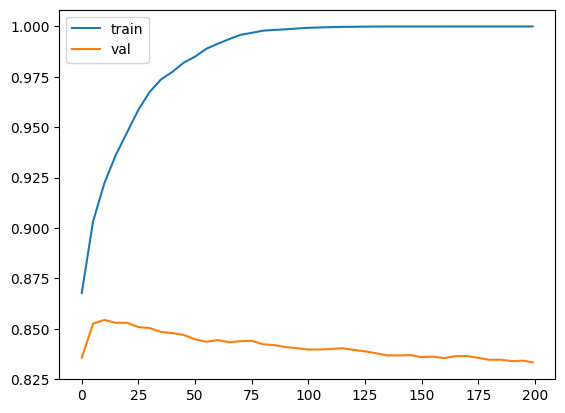

In [ ]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

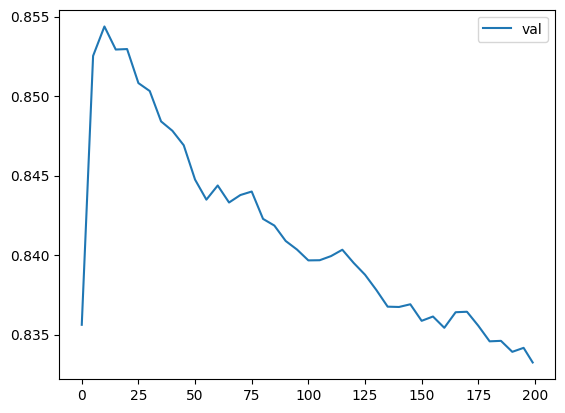

In [ ]:
# It's overfitted that's why Val declines
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

XGBoost Parameter Tuning

In [ ]:
scores = {}

In [ ]:

%%capture output

xgb_params = {
    'eta': 1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1'

In [ ]:
scores.keys()

dict_keys(['eta=0.1', 'eta=0.3', 'eta=0.05', 'eta=0.01', 'eta=1'])

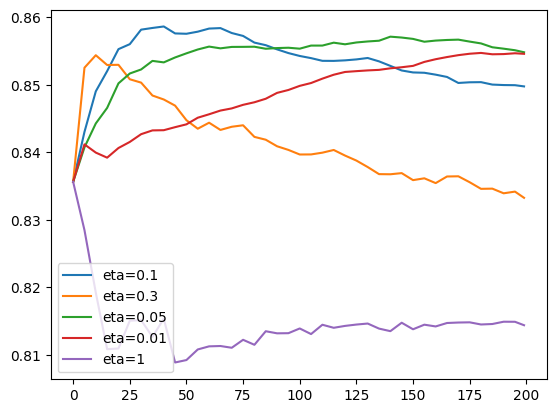

In [ ]:
etas = ['eta=0.1', 'eta=0.3', 'eta=0.05', 'eta=0.01', 'eta=1']

for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

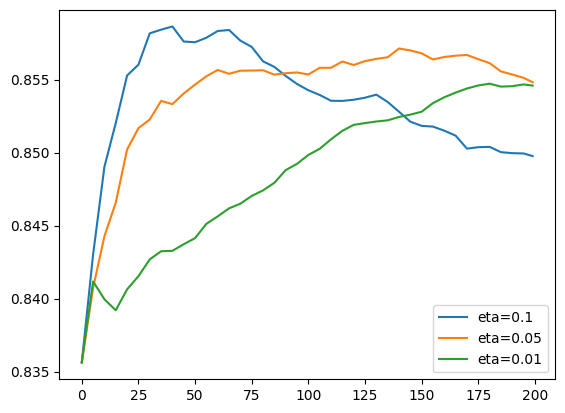

In [ ]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']

for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

ETA = 0.05 seems best as it reaches a high AUC but without overfitting like eta = 0.1

In [ ]:
scores = {}

In [ ]:
# Next tune Max_depth
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=8'

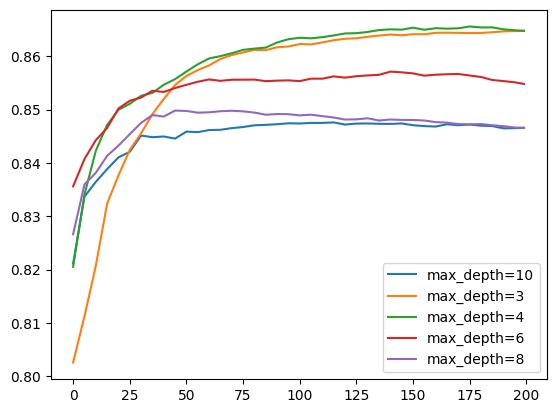

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

#plt.ylim(0.8, 0.84)
plt.legend()

Max Depth 4 is best as it acheives high performance without clear signs of overfitting.

Will now fit the best XGBoost Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
!pip install xgboost --upgrade


In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.exited.values
y_val = df_val.exited.values
y_test = df_test.exited.values

del df_train['exited']
del df_val['exited']
del df_test['exited']

In [ ]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dicts_val = df_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

In [ ]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
XGBOOST_model = xgb.XGBClassifier(max_depth=4, eta=0.05, use_label_encoder=False, eval_metric='logloss')  # Adjust parameters as needed



In [ ]:
XGBOOST_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:02:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print(type(XGBOOST_model))


<class 'xgboost.sklearn.XGBClassifier'>


Compare Logistic Regression to Decision Tree and to XGBoost

In [ ]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10, max_iter=1000, random_state=1)
log_reg.fit(X_train, y_train)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt_model.fit(X_train, y_train)

# Train XGBoost Model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=4, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get Probabilities and Predictions for Each Model

# Logistic Regression Predictions
y_prob_log_reg = log_reg.predict_proba(X_val)[:, 1]  # Probability of positive class
y_pred_log_reg = (y_prob_log_reg >= 0.24).astype(int)

# Decision Tree Predictions
y_prob_dt = dt_model.predict_proba(X_val)[:, 1]  # Probability of positive class
y_pred_dt = (y_prob_dt >= 0.5).astype(int)

# XGBoost Predictions
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]  # Probability of positive class
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)


# Calculate Metrics

# Logistic Regression Metrics
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)
f1_log_reg = f1_score(y_val, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_val, y_prob_log_reg)

# Decision Tree Metrics
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)
roc_auc_dt = roc_auc_score(y_val, y_prob_dt)

# XGBoost Metrics
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_val, y_prob_xgb)

# Display Results

print("Logistic Regression:")
print(f"  Precision: {precision_log_reg:.4f}")
print(f"  Recall:    {recall_log_reg:.4f}")
print(f"  F1 Score:  {f1_log_reg:.4f}")
print(f"  ROC AUC:   {roc_auc_log_reg:.4f}")

print("\nDecision Tree:")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall:    {recall_dt:.4f}")
print(f"  F1 Score:  {f1_dt:.4f}")
print(f"  ROC AUC:   {roc_auc_dt:.4f}")

print("\nXGBoost:")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall:    {recall_xgb:.4f}")
print(f"  F1 Score:  {f1_xgb:.4f}")
print(f"  ROC AUC:   {roc_auc_xgb:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:09:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression:
  Precision: 0.4108
  Recall:    0.6524
  F1 Score:  0.5041
  ROC AUC:   0.7711

Decision Tree:
  Precision: 0.7537
  Recall:    0.4881
  F1 Score:  0.5925
  ROC AUC:   0.8379

XGBoost:
  Precision: 0.7732
  Recall:    0.4952
  F1 Score:  0.6038
  ROC AUC:   0.8635


### **XGBoost is the best model!**